In [1]:
# !pip install -q tensorflow-datasets

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# load dataset
imagenette_dataset = tfds.load(
    'imagenette/320px-v2',
    split='validation',
    data_dir="dataset/",
    shuffle_files=True,
    as_supervised=True,
)

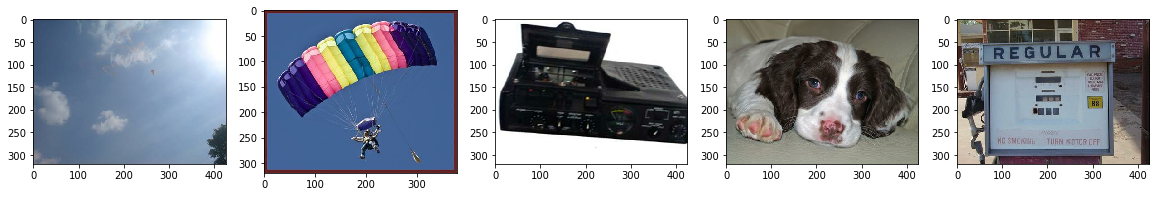

In [3]:
# show examples
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for idx, example in enumerate(imagenette_dataset.take(5)):
    # print(example[0], example[1])
    image, label = example
    arr_ = np.squeeze(image)
    axes[idx].imshow(image)
plt.show()


In [4]:
# normalization
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.
    image = tf.image.resize(image, (224, 224))
    return image, label

In [5]:
ds_test = imagenette_dataset.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


In [6]:
def model_generator(names_list, dataset):
    model_result = None
    for name in names_list:
        if name == "mobilenet":
            model = tf.keras.applications.mobilenet.MobileNet(weights='imagenet')
        elif name == "vgg16":
            model = tf.keras.applications.vgg16.VGG16(weights='imagenet')
        else:
            model = None

        if model:
            model.compile(
                loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'],
            )
            predictions = model.predict(dataset, verbose=1)
            model_result = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=5)

        yield model_result

In [7]:
model_names_list = ["mobilenet", "vgg16"]
gen_iter = model_generator(model_names_list, ds_test)

for name in model_names_list:
    model_result = next(gen_iter)
    # TODO top_5 algorithm
    print(model_result)



     31/Unknown - 10s 316ms/step[[('n03888257', 'pa